Generate plots based on datasets for 5 durations (60, 150, 300, 450, 600)

Duration is between 2s - 600sec, 10000 spike trains.

In [1]:
import numpy as np
import pandas as pd
import pickle

import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from cfg_global import project_folder_path
os.chdir(current_wd)

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
dataset_folder = project_folder_path + 'results\\synthetic\\dataset\\'
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau\\'
fig_folder = project_folder_path + 'results\\synthetic\\fig_drafts_paper\\'

In [79]:
save_fig = True

### Load data

In [4]:
# 60 sec
with open(results_folder + 'acf_full_50ms_20lags_len_60sec_dict.pkl', "rb") as f:
    acf_60_dict = pickle.load(f)

with open(results_folder + 'acf_isttc_full_50ms_20lags_len_60sec_dict.pkl', "rb") as f:
    sttc_60_dict = pickle.load(f)

# 150 sec
with open(results_folder + 'acf_full_50ms_20lags_len_150sec_dict.pkl', "rb") as f:
    acf_150_dict = pickle.load(f)

with open(results_folder + 'acf_isttc_full_50ms_20lags_len_150sec_dict.pkl', "rb") as f:
    sttc_150_dict = pickle.load(f)

# 300 sec
with open(results_folder + 'acf_full_50ms_20lags_len_300sec_dict.pkl', "rb") as f:
    acf_300_dict = pickle.load(f)

with open(results_folder + 'acf_isttc_full_50ms_20lags_len_300sec_dict.pkl', "rb") as f:
    sttc_300_dict = pickle.load(f)

# 450 sec
with open(results_folder + 'acf_full_50ms_20lags_len_450sec_dict.pkl', "rb") as f:
    acf_450_dict = pickle.load(f)

with open(results_folder + 'acf_isttc_full_50ms_20lags_len_450sec_dict.pkl', "rb") as f:
    sttc_450_dict = pickle.load(f)

# 600 sec
with open(results_folder + 'acf_full_50ms_20lags_dict.pkl', "rb") as f:
    acf_600_dict = pickle.load(f)

with open(results_folder + 'acf_isttc_full_50ms_20lags_dict.pkl', "rb") as f:
    sttc_600_dict = pickle.load(f)

print(f'len acf_60_dict {len(acf_60_dict)}')
print(f'len sttc_60_dict {len(sttc_60_dict)}')

print(f'len acf_150_dict {len(acf_150_dict)}')
print(f'len sttc_150_dict {len(sttc_150_dict)}')

print(f'len acf_300_dict {len(acf_300_dict)}')
print(f'len sttc_300_dict {len(sttc_300_dict)}')

print(f'len acf_450_dict {len(acf_450_dict)}')
print(f'len sttc_450_dict {len(sttc_450_dict)}')

print(f'len acf_600_dict {len(acf_600_dict)}')
print(f'len sttc_600_dict {len(sttc_600_dict)}')

len acf_60_dict 100000
len sttc_60_dict 100000
len acf_150_dict 100000
len sttc_150_dict 100000
len acf_300_dict 100000
len sttc_300_dict 100000
len acf_450_dict 100000
len sttc_450_dict 100000
len acf_600_dict 100000
len sttc_600_dict 100000


In [9]:
with open(dataset_folder + '1_spike_trains_3params_var_len600sec_100000.pkl','rb') as f:
    data = pickle.load(f)

#spike_trains = data['spike_trains']
alphas = data['alphas']
fr_values = data['fr_values']
taus_ms = data['tau_ms']
#duration_ms = data['duration_ms']

print(f'n spike trains {len(alphas)}')


# with open(results_folder + 'acf_isttc_full_50ms_20lags_var_len_dict.pkl', "rb") as f:
#     isttc_full_dict = pickle.load(f)

# with open(results_folder + 'acf_full_50ms_20lags_var_len_dict.pkl', "rb") as f:
#     acf_full_dict = pickle.load(f)

# print(f'len isttc_full_dict {len(isttc_full_dict)}')
# print(f'len acf_full_dict {len(acf_full_dict)}')

n spike trains 100000


### Make summary dfs

In [5]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags+1)]
print('acf_cols {}'.format(acf_cols))

acf_cols ['acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19', 'acf_20']


In [6]:
def calculate_acf_decline_flag(acf_, start_idx=1, end_idx=4):
    acf_decay = np.all(np.diff(acf_[start_idx:end_idx]) <= 0)
    return acf_decay

In [ ]:
# Generate 20 log spaced floats between 2 and 600
# values = np.logspace(np.log10(2), np.log10(600), num=6)
# values = np.linspace(2, 600, num=6)
values = [2, 10, 50, 100, 200, 300, 600]
edges_int = np.round(values).astype(int)
# interval labels for df column
labels = [f"interval_{edges_int[i]}_{edges_int[i+1]}" for i in range(len(edges_int)-1)]

In [ ]:
edges_int

In [48]:
def get_acf_plot_df(acf_dict_, signal_len_, method_, alphas_, fr_values_, taus_ms_):
    data = []
    for unit_id, unit_data in acf_dict_.items():
        taus = unit_data['taus']  
        data.append({
            'unit_id': unit_id,
            'tau': taus['tau'],
            'fit_r_squared': taus['fit_r_squared'],
            'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
        })
    acf_full_plot_df = pd.DataFrame(data)
    acf_full_plot_df['method'] = method_
    acf_full_plot_df['tau_ms'] = acf_full_plot_df['tau'] * 50
    
    acf_full_plot_df['duration_s'] = signal_len_
    
    acf_full_plot_df['fr'] = fr_values_
    acf_full_plot_df['alpha'] = alphas_
    acf_full_plot_df['tau_ms_true'] = taus_ms_
    acf_full_plot_df['tau_diff_abs'] = np.abs(acf_full_plot_df['tau_ms'] - acf_full_plot_df['tau_ms_true'])
    acf_full_plot_df['tau_diff_rel'] = acf_full_plot_df['tau_diff_abs'] / acf_full_plot_df['tau_ms_true'] * 100
    
    rows_with_nans_df = acf_full_plot_df[acf_full_plot_df.isna().any(axis=1)]
    n_rows_with_nan = len(rows_with_nans_df)
    print(f'N rows with NaNs {n_rows_with_nan}')
    
    return acf_full_plot_df

In [49]:
acf_60_df = get_acf_plot_df(acf_60_dict, 60, 'acf_full', alphas, fr_values, taus_ms)
acf_150_df = get_acf_plot_df(acf_150_dict, 150, 'acf_full', alphas, fr_values, taus_ms)
acf_300_df = get_acf_plot_df(acf_300_dict, 300, 'acf_full', alphas, fr_values, taus_ms)
acf_450_df = get_acf_plot_df(acf_450_dict, 450, 'acf_full', alphas, fr_values, taus_ms)
acf_600_df = get_acf_plot_df(acf_600_dict, 600, 'acf_full', alphas, fr_values, taus_ms)

N rows with NaNs 383
N rows with NaNs 123
N rows with NaNs 34
N rows with NaNs 18
N rows with NaNs 11


In [50]:
isttc_60_df = get_acf_plot_df(sttc_60_dict, 60, 'isttc_full', alphas, fr_values, taus_ms)
isttc_150_df = get_acf_plot_df(sttc_150_dict, 150, 'isttc_full', alphas, fr_values, taus_ms)
isttc_300_df = get_acf_plot_df(sttc_300_dict, 300, 'isttc_full', alphas, fr_values, taus_ms)
isttc_450_df = get_acf_plot_df(sttc_450_dict, 450, 'isttc_full', alphas, fr_values, taus_ms)
isttc_600_df = get_acf_plot_df(sttc_600_dict, 600, 'isttc_full', alphas, fr_values, taus_ms)

N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0


In [52]:
# check for NaNs 
acf_60_df_nans_df = acf_60_df[acf_60_df.isna().any(axis=1)]
print(f'N rows with NaNs {len(acf_60_df_nans_df)}')
# take from isttc dataset only rows where acf df has no NaNs
isttc_60_df = isttc_60_df[~isttc_60_df['unit_id'].isin(acf_60_df_nans_df['unit_id'].values)]
acf_60_df = acf_60_df[~acf_60_df['unit_id'].isin(acf_60_df_nans_df['unit_id'].values)]
print(f'len acf_60_df {len(acf_60_df)}, len isttc_60_df {len(isttc_60_df)}')

acf_150_df_nans_df = acf_150_df[acf_150_df.isna().any(axis=1)]
print(f'N rows with NaNs {len(acf_150_df_nans_df)}')
# take from isttc dataset only rows where acf df has no NaNs
isttc_150_df = isttc_150_df[~isttc_150_df['unit_id'].isin(acf_150_df_nans_df['unit_id'].values)]
acf_150_df = acf_150_df[~acf_150_df['unit_id'].isin(acf_150_df_nans_df['unit_id'].values)]
print(f'len acf_150_df {len(acf_150_df)}, len isttc_150_df {len(isttc_150_df)}')

acf_300_df_nans_df = acf_300_df[acf_300_df.isna().any(axis=1)]
print(f'N rows with NaNs {len(acf_300_df_nans_df)}')
# take from isttc dataset only rows where acf df has no NaNs
isttc_300_df = isttc_300_df[~isttc_300_df['unit_id'].isin(acf_300_df_nans_df['unit_id'].values)]
acf_300_df = acf_300_df[~acf_300_df['unit_id'].isin(acf_300_df_nans_df['unit_id'].values)]
print(f'len acf_300_df {len(acf_300_df)}, len isttc_300_df {len(isttc_300_df)}')

acf_450_df_nans_df = acf_450_df[acf_450_df.isna().any(axis=1)]
print(f'N rows with NaNs {len(acf_450_df_nans_df)}')
# take from isttc dataset only rows where acf df has no NaNs
isttc_450_df = isttc_450_df[~isttc_450_df['unit_id'].isin(acf_450_df_nans_df['unit_id'].values)]
acf_450_df = acf_450_df[~acf_450_df['unit_id'].isin(acf_450_df_nans_df['unit_id'].values)]
print(f'len acf_450_df {len(acf_450_df)}, len isttc_450_df {len(isttc_450_df)}')

acf_600_df_nans_df = acf_600_df[acf_600_df.isna().any(axis=1)]
print(f'N rows with NaNs {len(acf_600_df_nans_df)}')
# take from isttc dataset only rows where acf df has no NaNs
isttc_600_df = isttc_600_df[~isttc_600_df['unit_id'].isin(acf_600_df_nans_df['unit_id'].values)]
acf_600_df = acf_600_df[~acf_600_df['unit_id'].isin(acf_600_df_nans_df['unit_id'].values)]
print(f'len acf_600_df {len(acf_600_df)}, len isttc_600_df {len(isttc_600_df)}')

N rows with NaNs 383
len acf_60_df 99617, len isttc_60_df 99617
N rows with NaNs 123
len acf_150_df 99877, len isttc_150_df 99877
N rows with NaNs 34
len acf_300_df 99966, len isttc_300_df 99966
N rows with NaNs 18
len acf_450_df 99982, len isttc_450_df 99982
N rows with NaNs 11
len acf_600_df 99989, len isttc_600_df 99989


In [53]:
def remove_neg_rsquared(acf_df_, isttc_df_):
    # check for negative R-square
    rows_with_negr_acf_df = acf_df_.query('fit_r_squared < 0')
    n_rows_with_negr_acf = len(rows_with_negr_acf_df)
    print(f'N rows with neg R {n_rows_with_negr_acf}')
    
    
    rows_with_negr_isttc_df = isttc_df_.query('fit_r_squared < 0')
    n_rows_with_negr_isttc = len(rows_with_negr_isttc_df)
    print(f'N rows with neg R {n_rows_with_negr_isttc}')
    
    acf_negr_unit_ids = rows_with_negr_acf_df['unit_id'].values
    isttc_negr_unit_ids = rows_with_negr_isttc_df['unit_id'].values
    
    unit_ids_negr_union = set(acf_negr_unit_ids).union(isttc_negr_unit_ids)
    print(f'N rows in unit_ids_negr_union {len(unit_ids_negr_union)}')
    
    isttc_df_ = isttc_df_[~isttc_df_['unit_id'].isin(unit_ids_negr_union)]
    acf_full_plot_df = acf_df_[~acf_df_['unit_id'].isin(unit_ids_negr_union)]
    
    print(f'len acf_df_ {len(acf_df_)}, len isttc_full_plot_df {len(isttc_df_)}')

    return acf_df_, isttc_df_

In [54]:
acf_60_df, isttc_60_df = remove_neg_rsquared(acf_60_df, isttc_60_df)
acf_150_df, isttc_150_df = remove_neg_rsquared(acf_150_df, isttc_150_df)
acf_300_df, isttc_300_df = remove_neg_rsquared(acf_300_df, isttc_300_df)
acf_450_df, isttc_450_df = remove_neg_rsquared(acf_450_df, isttc_450_df)
acf_600_df, isttc_600_df = remove_neg_rsquared(acf_600_df, isttc_600_df)

N rows with neg R 3003
N rows with neg R 3123
N rows in unit_ids_negr_union 4294
len acf_df_ 99617, len isttc_full_plot_df 95323
N rows with neg R 1326
N rows with neg R 1294
N rows in unit_ids_negr_union 1889
len acf_df_ 99877, len isttc_full_plot_df 97988
N rows with neg R 659
N rows with neg R 669
N rows in unit_ids_negr_union 933
len acf_df_ 99966, len isttc_full_plot_df 99033
N rows with neg R 376
N rows with neg R 361
N rows in unit_ids_negr_union 520
len acf_df_ 99982, len isttc_full_plot_df 99462
N rows with neg R 237
N rows with neg R 238
N rows in unit_ids_negr_union 331
len acf_df_ 99989, len isttc_full_plot_df 99658


In [55]:
tau_plot_long_df = pd.concat([acf_60_df, isttc_60_df, acf_150_df, isttc_150_df, 
                              acf_300_df, isttc_300_df, acf_450_df, isttc_450_df, 
                              acf_600_df, isttc_600_df])
tau_plot_long_df.reset_index(inplace=True, drop=True)

print(f'len tau_plot_long_df {len(tau_plot_long_df)}')

len tau_plot_long_df 990895


In [74]:
acf_tau_plot_long_df = pd.concat([acf_60_df, acf_150_df,
                              acf_300_df, acf_450_df,
                              acf_600_df])
acf_tau_plot_long_df.reset_index(inplace=True, drop=True)

In [75]:
sttc_tau_plot_long_df = pd.concat([isttc_60_df, isttc_150_df, 
                              isttc_300_df, isttc_450_df, 
                              isttc_600_df])
sttc_tau_plot_long_df.reset_index(inplace=True, drop=True)

In [76]:
tau_plot_wide_df = acf_tau_plot_long_df.merge(sttc_tau_plot_long_df, suffixes=('_acf', '_isttc'), 
                                          on=['unit_id','fr', 'alpha', 'tau_ms_true', 'duration_s'], 
                                          how='left')
tau_plot_wide_df.reset_index(inplace=True, drop=True)

print(f'len tau_plot_wide_df {len(tau_plot_wide_df)}')

tau_plot_wide_df.columns

len tau_plot_wide_df 499431


Index(['unit_id', 'tau_acf', 'fit_r_squared_acf', 'decline_150_250_acf',
       'method_acf', 'tau_ms_acf', 'duration_s', 'fr', 'alpha', 'tau_ms_true',
       'tau_diff_abs_acf', 'tau_diff_rel_acf', 'tau_isttc',
       'fit_r_squared_isttc', 'decline_150_250_isttc', 'method_isttc',
       'tau_ms_isttc', 'tau_diff_abs_isttc', 'tau_diff_rel_isttc'],
      dtype='object')

### Export for stats

In [78]:
tau_plot_long_df.to_csv(results_folder + 'tau_plot_long_var_len_5durations_df.csv')

### Plots

In [56]:
color_acf_full = '#708090' # slate gray
color_isttc_full = '#00A9E2' # steel blue

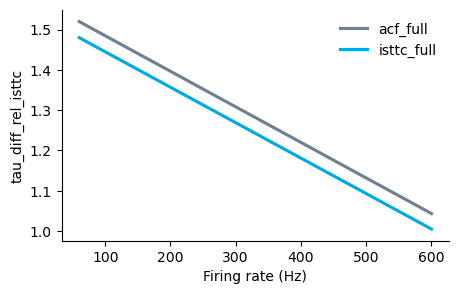

In [77]:
# just to check, I plot the same as predicted values from the model
fig, axes = plt.subplots(1,1, figsize=(5, 3), sharey=False)

sns.regplot(x=tau_plot_wide_df['duration_s'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_acf']), scatter=None, ax=axes, 
            label='acf_full', color=color_acf_full)
sns.regplot(x=tau_plot_wide_df['duration_s'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_isttc']), scatter=None, ax=axes, 
            label='isttc_full', color=color_isttc_full)
axes.legend(frameon=False)

axes.set_xlabel('Firing rate (Hz)')

# for ax in axes.flat:
#     ax.set_ylabel('Log10 diff(IT, \nground truth) (ms)')

sns.despine()

# if save_fig:
#     plt.savefig(fig_folder + 'taus_dataset_duration_var_diff_regplot.png' , bbox_inches='tight', dpi=300)
#     plt.savefig(fig_folder + 'taus_dataset_duration_var_diff_regplot.svg' , bbox_inches='tight')

In [57]:
# intervals for error plots
intervals = {
    '+-100':   (0,   100),
    '+-75':  (0,  75),
    '+-50':  (0,  50),
    '+-25':  (0,  25),
}

# tau_2methods_df = pd.concat([acf_full_plot_df, isttc_full_plot_df])
tau_2methods_df = tau_plot_long_df
tau_2methods_df['log_tau_ms'] = np.log10(tau_2methods_df['tau_ms'])
#tau_2methods_df.reset_index(inplace=True, drop=True)

df = tau_2methods_df.copy()
rows = []
for method, sub in df.groupby(by=['method','duration_s']):
    total = len(sub)
    row = {'method': method}
    for name, (lo, hi) in intervals.items():
        cnt = sub['tau_diff_rel'].between(lo, hi).sum()
        row[name] = cnt/total*100
    rows.append(row)
tau_2methods_error_df = pd.DataFrame(rows).set_index('method')

# make long df
tau_2methods_error_df = tau_2methods_error_df.reset_index()
tau_2methods_error_long_df = tau_2methods_error_df.melt(
    id_vars='method',
    var_name='interval',
    value_name='percentage'
)

tau_2methods_error_long_df[['method','duration_s']] = pd.DataFrame(
    tau_2methods_error_long_df['method'].tolist(),
    index=tau_2methods_error_long_df.index
)
tau_2methods_error_long_df = tau_2methods_error_long_df.rename(columns={'interval':'error_interval'})
tau_2methods_error_long_df = tau_2methods_error_long_df[['method','duration_s','error_interval','percentage']]

In [62]:
tau_2methods_error_long_df['method'].unique()

array(['acf_full', 'isttc_full'], dtype=object)

In [63]:
# prep for heatmaps
# ACF
acf = tau_2methods_error_long_df[
    tau_2methods_error_long_df['method']=='acf_full'
]
acf_pivot = acf.pivot(
    index='duration_s',
    columns='error_interval',
    values='percentage'
)

# ISTTC
isttc = tau_2methods_error_long_df[
    tau_2methods_error_long_df['method']=='isttc_full'
]
isttc_pivot = isttc.pivot(
    index='duration_s',
    columns='error_interval',
    values='percentage'
)

diff_pivot = acf_pivot-isttc_pivot

In [65]:
acf_pivot

error_interval,+-100,+-25,+-50,+-75
duration_s,,,,
60,89.820011,32.423181,59.741811,75.132758
150,93.610140,47.295173,75.088359,85.627322
300,95.853590,60.510574,84.310666,91.461097
450,96.974455,68.103259,88.404913,93.978916
600,97.569733,73.344068,90.903999,95.351489


In [64]:
isttc_pivot

error_interval,+-100,+-25,+-50,+-75
duration_s,,,,
60,89.483126,35.736391,63.567030,78.221416
150,93.659428,51.086868,77.561538,87.116790
300,95.867034,64.087728,85.664375,92.319732
450,96.947578,71.321711,89.324566,94.454163
600,97.559654,75.980855,91.529029,95.686247


In [72]:
diff_pivot

error_interval,+-100,+-25,+-50,+-75
duration_s,,,,
60,0.336885,-3.313210,-3.825219,-3.088657
150,-0.049287,-3.791695,-2.473179,-1.489468
300,-0.013444,-3.577155,-1.353709,-0.858635
450,0.026877,-3.218452,-0.919653,-0.475247
600,0.010079,-2.636787,-0.625030,-0.334758


-3.825218856108073
0.3368848473988635


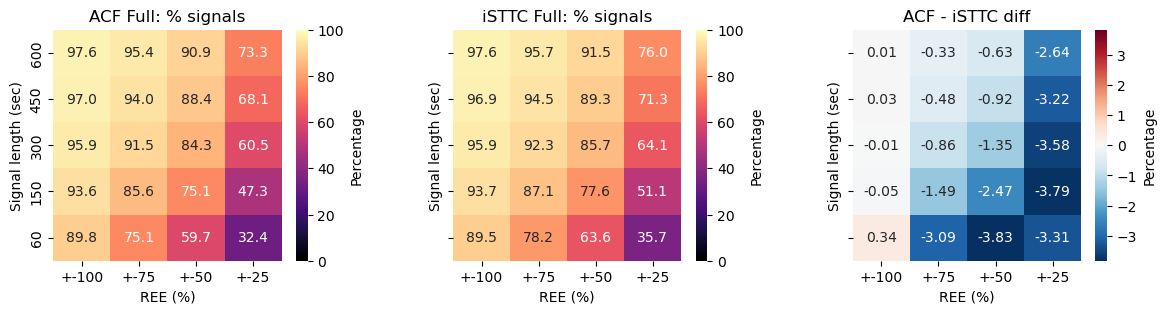

In [81]:
col_order = ['+-100', '+-75', '+-50', '+-25']
row_order = sorted(diff_pivot.index, reverse=True)

acf_ordered  = acf_pivot.reindex(index=row_order, columns=col_order)
isttc_ordered  = isttc_pivot.reindex(index=row_order, columns=col_order)
diff_pivot_ordered  = diff_pivot.reindex(index=row_order, columns=col_order)

# plot ACF heatmap
fig, axes = plt.subplots(1, 3, figsize=(14, 3), sharey=True)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

diff_limit = np.max([np.abs(diff_pivot_ordered.min().min()), 
                     np.abs(diff_pivot_ordered.max().max())])

norm = TwoSlopeNorm(vcenter=0, vmin=-diff_limit, vmax=diff_limit)

sns.heatmap(
    acf_ordered,
    cmap="magma", vmin=0, vmax=100,
    cbar_kws={'label': 'Percentage'}, 
    annot=True, fmt=".1f",
    ax=axes[0]
)
axes[0].set_title("ACF Full: % signals")

sns.heatmap(
    isttc_ordered,
    cmap="magma", vmin=0, vmax=100,
    cbar_kws={'label': 'Percentage'}, 
    annot=True, fmt=".1f",
    ax=axes[1]
)
axes[1].set_title('iSTTC Full: % signals')

sns.heatmap(
    diff_pivot_ordered,
    cmap="RdBu_r", #"coolwarm", 
    norm=norm,
    cbar_kws={'label': 'Percentage'},
    annot=True, fmt=".2f",
    ax=axes[2]
)
axes[2].set_title('ACF - iSTTC diff')
print(diff_pivot_ordered.min().min())
print(diff_pivot_ordered.max().max())

for ax in axes.flat:
    ax.set_xlabel('REE (%)')
    ax.set_ylabel('Signal length (sec)')
if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_duration_5var_heatmaps_colors2_param.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_duration_5var_heatmaps_colors2_param.svg' , bbox_inches='tight')